# 读文件

In [5]:
list = []
with open(r"C:/Users/lenovo/Desktop/123.txt", encoding='utf-8') as f:#从TXT文件中读出数据
    for line1 in f:
        list.append(line1)  #通过for循环一行一行加载

datalist=[]      #定义一个数组
for item in list:    #通过一个for循环将每一行按照空格分成不同的字符段
    l = item.split('\t')  #这句使用空格将item分割成字符段
    datalist.append(l)#将l放入数组


# 时间戳转换

In [208]:
import datetime
import numpy as np
data = np.array(datalist, np.ndarray)

for i in range(data.shape[0]):
    timeStamp = float(data[i, 0])
    dateArray = datetime.datetime.utcfromtimestamp(timeStamp / 1000)
    data[i, 0] = dateArray.strftime("%Y-%m-%d %H:%M:%S")

In [209]:
for k in range(data.shape[0]):
    data[k, 5] = data[k, 5].replace('\n', '')

In [223]:
jing = []
for k in range(data.shape[0]):
    if data[k, 1] == '京ACK766':
        jing.append(data[k, :])
jing = np.array(jing)
jing = jing[jing[:,0].argsort()]
jing

array([['2020-04-21 06:44:41', '京ACK766', '117734960', '39051026', '58',
        '58'],
       ['2020-04-21 06:49:02', '京ACK766', '117735710', '39027700', '37',
        '37'],
       ['2020-04-21 07:00:38', '京ACK766', '117742446', '39014196', '42',
        '42'],
       ['2020-04-21 07:01:07', '京ACK766', '117740271', '39015065', '3',
        '2'],
       ['2020-04-21 07:01:13', '京ACK766', '117740296', '39015105', '3',
        '2'],
       ['2020-04-21 07:01:15', '京ACK766', '117740310', '39015120', '2',
        '1'],
       ['2020-04-21 07:01:36', '京ACK766', '117740321', '39015135', '3',
        '2'],
       ['2020-04-21 07:01:37', '京ACK766', '117740331', '39015140', '2',
        '2'],
       ['2020-04-21 07:02:03', '京ACK766', '117740336', '39015141', '0',
        '0'],
       ['2020-04-21 07:02:32', '京ACK766', '117740336', '39015141', '0',
        '0'],
       ['2020-04-21 07:03:01', '京ACK766', '117740336', '39015141', '0',
        '0'],
       ['2020-04-21 07:03:30', '京ACK766', '11774

In [218]:
data.shape

(1146339, 6)

In [49]:
# data = np.array(datalist)
data = data[data[:,0].argsort()]

In [45]:
# print(data.shape)
# print(len(np.unique(data)))
dlist = []
flag = 0
for i in range(data.shape[0]):
    dlist.append(data[i, :].tolist())
for i in range(data.shape[0] - 1):
    if dlist[i] == dlist[i + 1]:
        flag = 1;
        break;
print(dlist[i])
print(dlist[i + 1])
print(flag)

1146337

# 停留点检测

In [8]:
# dif = np.unique(data[:, 1])#得到不同车辆的总数
# d = np.array([[1, 1], [2, 12]])
# np.delete(d, 0, 1)
car_sort = data[data[:,1].argsort()]


In [12]:
# car_sort = data[data[:,1].argsort()]
i = 0
new_data = []
while i < car_sort.shape[0]:
    car_list = []
    if (i + 1) < car_sort.shape[0] and car_sort[i, 1] == car_sort[i + 1, 1]:
        car_list.append(car_sort[i, :])
        i += 1
        while (i + 1) < car_sort.shape[0] and car_sort[i, 1] == car_sort[i + 1, 1]:
            car_list.append(car_sort[i, :])
            i += 1
        car_list.append(car_sort[i, :])
        car_list = np.array(car_list)
        car_list = car_list[car_list[:,0].argsort()]
        j = 0
        new_car_list = car_list
        while j < car_list.shape[0]:
            b = []
            if (j + 1) < car_list.shape[0] and car_list[j, 2:4].tolist() == car_list[j + 1, 2:4].tolist():
                b.append(j)
                j += 1
                while (j + 1) < car_list.shape[0] and car_list[j, 2:4].tolist() == car_list[j + 1, 2:4].tolist():
                    b.append(j)
                    j += 1
                b.append(j)
                temp1 = car_list[b[0], 0]
                temp2 = car_list[j, 0]
                if int(temp2[11:13]) < int(temp1[11:13]):
                    c = int(temp2[11:13]) + 24 - int(temp1[11:13])
                else:
                    c = int(temp2[11:13]) - int(temp1[11:13])
                if (c == 1 and temp1[14:16] <= temp2[14:16]) or c > 1:
#                     print(car_list[b])
                    new_car_list = np.delete(car_list, b, 0)
            j += 1
        flag = 0
        for k in range(new_car_list.shape[0]):
            if new_car_list[k, 4] == '0' and new_car_list[k, 5] == '0':
                flag += 1 
        if flag != new_car_list.shape[0]:
            for k in range(new_car_list.shape[0]):
                new_data.append(new_car_list[k, :])
#         else:
#             for k in range(new_car_list.shape[0]):
#                 print(new_car_list[k, :])
    else:
        if car_sort[i, 4] != '0' or car_sort[i, 5] != '0':
            new_data.append(car_sort[i, :])
#         else:
#             print(car_sort[i, :])
    i += 1
np.array(new_data).shape

(827177, 6)

In [84]:
data.shape

(1146339, 6)

In [81]:
for i in range(n):
    if data[i, 1] == '京ABS188':
        print(data[i, :])

['2020-04-21 01:16:41' '京ABS188' '117734863' '39045683' '47' '0']
['2020-04-21 05:14:35' '京ABS188' '117759120' '39013880' '0' '0']
['2020-04-21 05:16:05' '京ABS188' '117758286' '39014200' '0' '0']
['2020-04-21 05:16:35' '京ABS188' '117758286' '39014200' '0' '0']
['2020-04-21 05:17:05' '京ABS188' '117758286' '39014200' '0' '0']
['2020-04-21 05:17:35' '京ABS188' '117758286' '39014200' '0' '0']
['2020-04-21 05:18:05' '京ABS188' '117758286' '39014200' '0' '0']
['2020-04-21 05:18:35' '京ABS188' '117758286' '39014200' '0' '0']
['2020-04-21 05:19:05' '京ABS188' '117758286' '39014200' '0' '0']
['2020-04-21 05:19:35' '京ABS188' '117758286' '39014200' '0' '0']
['2020-04-21 05:20:05' '京ABS188' '117758286' '39014200' '0' '0']
['2020-04-21 05:20:35' '京ABS188' '117758286' '39014200' '0' '0']
['2020-04-21 05:21:05' '京ABS188' '117758286' '39014200' '0' '0']
['2020-04-21 05:21:35' '京ABS188' '117758286' '39014200' '0' '0']
['2020-04-21 05:22:05' '京ABS188' '117758286' '39014200' '0' '0']
['2020-04-21 05:22:35' '

# 3σ准则

In [126]:
new_data = np.array(new_data)
sum_v1 = 0
sum_v2 = 0
n = new_data.shape[0]
for i in range(n):
    sum_v1 += int(new_data[i, 4])
    sum_v2 += int(new_data[i, 5])
mean_v1 = 1.0 * sum_v1 / n
mean_v2 = 1.0 * sum_v2 / n
sigma_v1 = 0
sigma_v2 = 0
for i in range(n):
    sigma_v1 += (int(new_data[i, 4]) - mean_v1) * (int(new_data[i, 4]) - mean_v1)
    sigma_v2 += (int(new_data[i, 5]) - mean_v2) * (int(new_data[i, 5]) - mean_v2)
sigma_v1 = (1.0 * sigma_v1 / n)**0.5
sigma_v2 = (1.0 * sigma_v2 / n)**0.5
r_down1 = mean_v1 - 3 * sigma_v1
r_up1 = mean_v1 + 3 * sigma_v1
r_down2 = mean_v2 - 3 * sigma_v2
r_up2 = mean_v2 + 3 * sigma_v2
out_range = []
for i in range(n):
    if (int(new_data[i, 4]) < r_down1 or int(new_data[i, 4]) > r_up1) and (int(new_data[i, 5]) < r_down2 or int(new_data[i, 5]) > r_up2):
        out_range.append((new_data[i, :]))

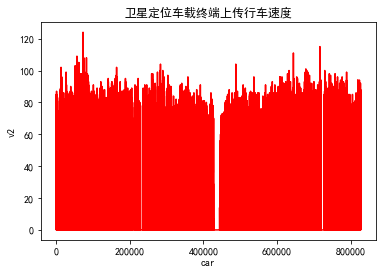

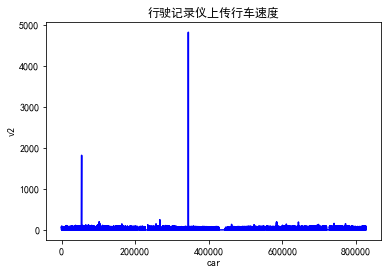

In [14]:
import matplotlib.pyplot as plt
new_data = np.array(new_data)
v1 = []
v2 = []
for i in range(new_data.shape[0]):
    v1.append(int(new_data[i, 4]))
    v2.append(int(new_data[i, 5]))
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.plot(range(new_data.shape[0]), v1, 'r')
plt.title('卫星定位车载终端上传行车速度')
plt.xlabel('car')
plt.ylabel('v2')
plt.show()

plt.plot(range(new_data.shape[0]), v2, 'b')
plt.title('行驶记录仪上传行车速度')
plt.xlabel('car')
plt.ylabel('v2')
 
plt.show()

In [219]:
new_data.shape[0]

827177

# 设定阈值

In [15]:
new = new_data
index = []
for i in range(new.shape[0]):
    if int(new[i, 4]) > 110 and int(new[i, 5]) > 110:
        index.append(i)
new = np.delete(new_data, index, 0)
for i in range(new.shape[0]):
    if int(new[i, 4]) > 110:
        new[i, 4] = new[i, 5]
    elif int(new[i, 5]) > 110:
        new[i, 5] = new[i, 4]

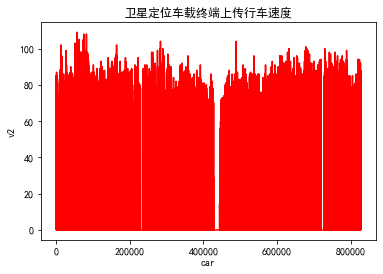

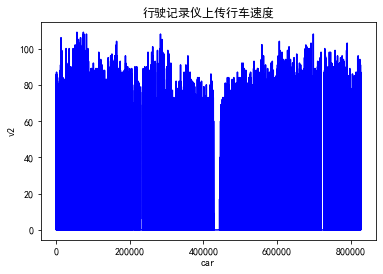

In [16]:
v1 = []
v2 = []
for i in range(new.shape[0]):
    v1.append(int(new[i, 4]))
    v2.append(int(new[i, 5]))
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.plot(range(new.shape[0]), v1, 'r')
plt.title('卫星定位车载终端上传行车速度')
plt.xlabel('car')
plt.ylabel('v2')
plt.show()

plt.plot(range(new.shape[0]), v2, 'b')
plt.title('行驶记录仪上传行车速度')
plt.xlabel('car')
plt.ylabel('v2')
 
plt.show()

# 写文件（属性值）

In [150]:
import openpyxl
def write_excel_xlsx(path, sheet_name, value):
    index = len(value)
    workbook = openpyxl.Workbook()
    sheet = workbook.active
    sheet.title = sheet_name
    for i in range(0, index):
        for j in range(0, len(value[i])):
            sheet.cell(row=i+1, column=j+1, value=str(value[i][j]))
    workbook.save(path)
    print("xlsx格式表格写入数据成功！")

In [209]:
# new = new[new[:,0].argsort()]
book_name_xlsx = 'data.xlsx'
sheet_name_xlsx = 'Sheet1'
title = [['日期', '实际交通量', '饱和度', '平均速度1', '平均速度1', 'TSI1 ', 'TSI2 ','密度']]
write_excel_xlsx(book_name_xlsx, sheet_name_xlsx, title)
t = new[0, 0]
n = new.shape[0]
start = int(t[8:10])
t = new[n - 1, 0]
end = int(t[8:10])
temp = 0 #从第几辆车开始提取
k = start
while k <= end:
    d = k
    while d == k and temp < new.shape[0] - 1:
        u = new[temp, 0]
        hour = u[11:13]
        minite = u[14:16]
        second = u[17:19]
        d = int(u[8:10])
        m = int(minite)
        end_m = m + 5
        car_num = []
        while m < end_m + 1 and d == k and (temp + 1) < new.shape[0]:#提取五分钟的车辆数据
            car_num.append(new[temp, :])
            temp = temp + 1
            c = new[temp, 0]
            m = int(c[14:16])
            s = int(c[17:19])
            d = int(c[8:10])
            if end > 60:
                 if m < int(minite):
                        m = m + 60
            if s > int(second) and m == end:
                break
        car_num = np.array(car_num)
        if car_num.shape[0] != 0:
            flow_num = car_num.shape[0]
            baohedu = flow_num / 120.0
            v1 = car_num[:, 4]
            sum_v1 = 0
            for i in range(flow_num):
                sum_v1 = sum_v1 + int(car_num[i, 4])
            mean_v1 = sum_v1 / flow_num
            v2 = car_num[:, 5]
            sum_v2 = 0
            for i in range(flow_num):
                sum_v2 = sum_v2 + int(car_num[i, 5])
            mean_v2 = sum_v2 / flow_num
            tsi_v1 = (40.0 - mean_v1) / 40.0
            tsi_v2 = (40.0 - mean_v2) / 40.0
            midu = flow_num / 0.607
            data = openpyxl.load_workbook('data.xlsx')

            # 取第一张表
            sheetnames = data.get_sheet_names()
            table = data.get_sheet_by_name(sheetnames[0])

            table = data.active
            print(table.title)  # 输出表名
            nrows = table.max_row  # 获得行数
            ncolumns = table.max_column  # 获得列数
            values = [[str((car_num[0, 0])[0:10]), str(flow_num), str(baohedu), str(mean_v1), str(mean_v2), str(tsi_v1), str(tsi_v2), str(midu)]]
            # 注意行业列下标是从1开始的
            for i in range(1, len(values)+1):
                for j in range(1, len(values[i-1])+1):
                    table.cell(nrows+i, j).value = values[i-1][j-1]
            data.save('data.xlsx')
    k += 1

xlsx格式表格写入数据成功！
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:56: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).
D:\anaconda3\lib\site-packages\ipykernel_launcher.py:57: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).



Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet

Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1
Sheet1

KeyboardInterrupt: 

In [208]:
# new = new[new[:,0].argsort()]

t = new[0, 0]
n = new.shape[0]
start = int(t[8:10])
t = new[n - 1, 0]
end = int(t[8:10])
temp = 0 #从第几辆车开始提取
k = start
with open("C:/Users/lenovo/Desktop/test1.txt", "w") as f:    #打开文件
    f.write(str('日期 '))
    f.write(str('实际交通量 '))
    f.write(str('饱和度 '))
    f.write(str('平均速度1 '))
    f.write(str('平均速度2 '))
    f.write(str('TSI1 '))
    f.write(str('TSI2 '))
    f.write(str('密度'))
    f.write('\n')
    while k <= end:
        j = k
        while j == k and temp < new.shape[0] - 1:
            u = new[temp, 0]
            hour = u[11:13]
            minite = u[14:16]
            second = u[17:19]
            j = int(u[8:10])
            m = int(minite)
            end_m = m + 5
            car_num = []
            while m < end_m + 1 and j == k and (temp + 1) < new.shape[0]:#提取五分钟的车辆数据
                car_num.append(new[temp, :])
                temp = temp + 1
                c = new[temp, 0]
                m = int(c[14:16])
                s = int(c[17:19])
                j = int(c[8:10])
                if end > 60:
                     if m < int(minite):
                            m = m + 60
                if s > int(second) and m == end:
                    break
            car_num = np.array(car_num)
            print(temp)
            if car_num.shape[0] != 0:
                flow_num = car_num.shape[0]
                baohedu = flow_num / 120.0
                sum_v1 = 0
                for i in range(flow_num):
                    sum_v1 = sum_v1 + int(car_num[i, 4])
                mean_v1 = sum_v1 / flow_num
                sum_v2 = 0
                for i in range(flow_num):
                    sum_v2 = sum_v2 + int(car_num[i, 5])
                mean_v2 = sum_v2 / flow_num
                tsi_v1 = (40.0 - mean_v1) / 40.0
                tsi_v2 = (40.0 - mean_v2) / 40.0
                midu = flow_num / 0.607
                f.write((car_num[0, 0])[0:10])
                f.write(' ')
                f.write(str(flow_num))
                f.write(' ')
                f.write(str(baohedu))
                f.write(' ')
                f.write(str(mean_v1))
                f.write(' ')
                f.write(str(mean_v2))
                f.write(' ')
                f.write(str(tsi_v1))
                f.write(' ')
                f.write(str(tsi_v2))
                f.write(' ')
                f.write(str(midu))
                f.write('\n')
        k += 1

484
486
490
493
494
496
498
500
502
504
507
509
513
514
515
517
523
524
526
528
530
531
534
536
539
543
547
548
553
554
557
558
560
564
569
572
575
579
583
588
592
593
595
596
602
606
608
611
614
618
620
624
627
630
633
636
640
1717
3154
4598
6023
7423
8802
14226
14231
14232
14235
14244
14251
14253
14256
14260
14266
14275
14281
14283
14284
14288
14291
14294
14298
14302
14306
14307
14315
14318
14321
14324
14330
14332
14336
14339
14342
14344
14348
14351
14354
14359
14362
14366
14368
14372
14375
14382
14384
14387
14390
14395
14397
14401
14407
14410
14412
14413
14417
14419
14422
14425
14432
14434
14442
15626
17087
18565
19920
21198
22385
27009
27015
27017
27019
27022
27025
27027
27030
27035
27042
27049
27053
27060
27067
27072
27074
27077
27080
27084
27087
27092
27093
27097
27102
27107
27110
27115
27119
27121
27126
27129
27132
27135
27137
27139
27140
27143
27147
27152
27154
27158
27159
27161
27163
27166
27167
27170
27172
27175
27179
27184
27187
27189
28224
29379
30601
31837
33123
34369
3905

224029
225368
230885
230890
230892
230894
230899
230904
230909
230911
230912
230916
230924
230928
230932
230938
230941
230943
230949
230954
230956
230961
230964
230968
230971
230978
230981
230982
230984
230987
230989
230999
231001
231004
231008
231012
231014
231016
231018
231021
231025
231032
231034
231039
231041
231045
231047
231052
231054
231058
231061
231065
231068
231070
231073
231076
231079
231084
231085
231088
232325
233647
234923
236277
237695
239172
244021
244025
244028
244030
244035
244038
244040
244044
244047
244050
244052
244057
244060
244066
244068
244073
244079
244084
244086
244090
244096
244100
244102
244103
244110
244111
244114
244117
244121
244122
244125
244130
244132
244137
244140
244141
244143
244146
244150
244152
244155
244160
244165
244168
244172
244176
244180
244183
244188
244197
244203
244205
244206
244213
244214
244215
244216
244218
245363
246644
247871
249169
250400
251695
256573
256574
256576
256579
256580
256583
256587
256591
256593
256594
256599
256604
256610

446883
447338
448853
450264
451298
452426
452431
452433
452439
452444
452447
452454
452460
452463
452471
452475
452480
452484
452491
452494
452499
452508
452511
452518
452526
452532
452540
452546
452550
452558
452561
452567
452569
452573
452574
452578
452582
452586
452592
452597
452598
452606
452613
452617
452624
452627
452633
452639
452646
452654
452656
452662
452667
452677
452683
452691
452699
452705
452709
452719
452722
452725
452726
452727
453969
455511
457398
459257
460703
462531
467640
467644
467646
467653
467656
467658
467665
467669
467672
467679
467682
467685
467688
467695
467704
467707
467712
467717
467719
467724
467727
467735
467742
467744
467752
467756
467760
467765
467773
467779
467785
467787
467789
467798
467803
467807
467811
467815
467818
467820
467824
467827
467831
467839
467846
467851
467856
467860
467866
467870
467877
467884
467891
467893
467900
467905
467910
467920
467923
468773
470282
472076
473794
475376
477380
496674
496680
496684
496692
496698
496707
496711
496719

715769
715771
715774
715778
715779
715781
715782
715786
715788
715792
715793
715797
715798
715800
715801
715803
715805
715806
715807
715809
715813
715815
715816
715820
715822
715824
715827
715829
715832
715834
715835
715837
715839
715840
715845
715846
715851
715854
715859
715864
715867
715871
715875
715879
715884
715886
715889
715891
715895
715900
715905
715907
715910
715913
715916
715922
716617
717451
718284
719099
719957
720842
724874
724877
724880
724884
724887
724892
724898
724901
724902
724904
724906
724910
724912
724914
724918
724921
724923
724927
724929
724931
724934
724936
724943
724946
724947
724949
724953
724956
724957
724961
724965
724968
724971
724976
724978
724980
724983
724988
724989
724990
724993
724994
724995
724999
725003
725005
725009
725012
725013
725016
725017
725022
725023
725024
725025
725898
726916
727902
728921
729891
730934
734630
734634
734640
734644
734646
734649
734652
734655
734656
734660
734664
734666
734668
734672
734674
734676
734678
734681
734684
734688

# 计算metrics(记录属性值)

In [22]:
new = new[new[:,0].argsort()]
metric = []
t = new[0, 0]
n = new.shape[0]
start = int(t[8:10])
t = new[n - 1, 0]
end = int(t[8:10])
temp = 0 #从第几辆车开始提取
k = start
while k <= end:
    j = k
    while j == k and temp < new.shape[0] - 1:
        u = new[temp, 0]
        hour = u[11:13]
        minite = u[14:16]
        second = u[17:19]
        j = int(u[8:10])
        m = int(minite)
        end_m = m + 5
        car_num = []
        while m < end_m + 1 and j == k and (temp + 1) < new.shape[0]:#提取五分钟的车辆数据
            car_num.append(new[temp, :])
            temp = temp + 1
            c = new[temp, 0]
            m = int(c[14:16])
            s = int(c[17:19])
            j = int(c[8:10])
            if end > 60:
                 if m < int(minite):
                        m = m + 60
            if s > int(second) and m == end:
                break
        car_num = np.array(car_num)
        if car_num.shape[0] != 0:
            flow_num = car_num.shape[0]
            baohedu = flow_num / 120.0
            sum_v1 = 0
            for i in range(flow_num):
                sum_v1 = sum_v1 + int(car_num[i, 4])
            mean_v1 = sum_v1 / flow_num
            sum_v2 = 0
            for i in range(flow_num):
                sum_v2 = sum_v2 + int(car_num[i, 5])
            mean_v2 = sum_v2 / flow_num
            tsi_v1 = (40.0 - mean_v1) / 40.0
            tsi_v2 = (40.0 - mean_v2) / 40.0
            midu = flow_num / 0.607
#             metrics.append([[(car_num[0, 0])[0:10]], [flow_num], [baohedu], [mean_v1], [mean_v2], [tsi_v1], [tsi_v2], [midu]])
            metric.append(((car_num[0, 0])[0:10], flow_num, baohedu, mean_v1, mean_v2, tsi_v1, tsi_v2, midu))
    k += 1

In [23]:
metric = np.array(metric)
data_19 = []
date = 19
i = 0
while date == 19:
    data_19.append(metric[i, :])
    t = metric[i, 0]
    date = int(t[8:10])
    i += 1

# 聚类

1 560.0893907946004
2 370.1996324285589
3 61.7185533808913
4 52.46450824167009
5 39.26808766328252
6 31.712952862891388
7 28.95368136053126
8 26.726821730365582
9 24.5076499080162
308.4810790476676 61.7185533808913 3
[560.0893907946004, 370.1996324285589, 61.7185533808913, 52.46450824167009, 39.26808766328252, 31.712952862891388, 28.95368136053126, 26.726821730365582, 24.5076499080162]


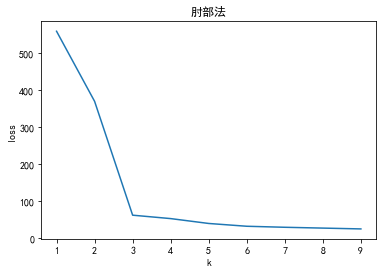

In [24]:
from scipy.spatial.distance import cdist
# list_lost = []
data = np.array(data_19)[:, 1:]
data = np.delete(data, [3, 5], 1)
def elbow_rule(data):
    # 肘部法则 求解最佳分类数
    # K-Means参数的最优解也是以成本函数最小化为目标
    # 成本函数是各个类畸变程度（distortions）之和。每个类的畸变程度等于该类重心与其内部成员位置距离的平方和
    a = []
    for k in range(1, 10):
        kmeans = KMeans(n_clusters = k)
        kmeans.fit(data)
        value = sum(np.min(cdist(data, kmeans.cluster_centers_, 'euclidean'),axis=1))/data.shape[0]
        print(k, value)
        a.append(value)

    cha = [a[i] - a[i + 1] for i in range(len(a) - 1)]
    a_v = a[cha.index(max(cha)) + 1]
    index =a.index(a_v) + 1
    print(max(cha), a_v, index)

    return a, index
list_lost, index = elbow_rule(data)
print(list_lost)
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.plot(range(1, len(list_lost) + 1), list_lost)

plt.title('肘部法')
plt.xlabel('k')
plt.ylabel('loss')
 
plt.show()

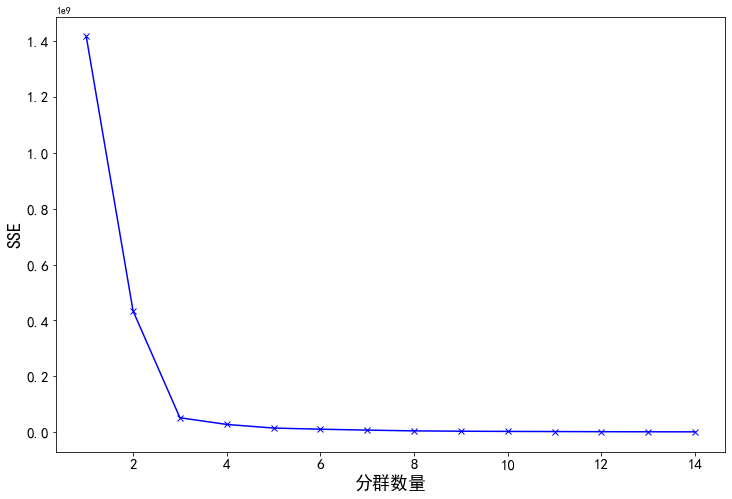

In [354]:
#创建空列表，依次创建k=1~15的模型并 保存SSE结果
sse_list = [ ] 
for k in range(1,15): 
    kmeans=KMeans(n_clusters=k, n_jobs = 6) 
    kmeans.fit(data) 
    sse_list.append(kmeans.inertia_)   #model.inertia_返回模型的误差平方和，保存进入列表
#     print(sse_list)
#折线图展示聚类数——SSE曲线
plt.figure() 
plt.plot(range(1,15), sse_list, 'bx-')
plt.rcParams['figure.figsize'] = [12,8]
plt.xlabel('分群数量',fontsize=18)
plt.ylabel('SSE',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

[0.9415303116573974]
[0.9415303116573974, 0.9616945768685229]
[0.9415303116573974, 0.9616945768685229, 0.960515544933203]
[0.9415303116573974, 0.9616945768685229, 0.960515544933203, 0.9420540191461126]
[0.9415303116573974, 0.9616945768685229, 0.960515544933203, 0.9420540191461126, 0.9429985873429072]
[0.9415303116573974, 0.9616945768685229, 0.960515544933203, 0.9420540191461126, 0.9429985873429072, 0.9414553206052141]
[0.9415303116573974, 0.9616945768685229, 0.960515544933203, 0.9420540191461126, 0.9429985873429072, 0.9414553206052141, 0.9431266481027712]
[0.9415303116573974, 0.9616945768685229, 0.960515544933203, 0.9420540191461126, 0.9429985873429072, 0.9414553206052141, 0.9431266481027712, 0.93980116606161]
[0.9415303116573974, 0.9616945768685229, 0.960515544933203, 0.9420540191461126, 0.9429985873429072, 0.9414553206052141, 0.9431266481027712, 0.93980116606161, 0.9397417558247354]
[0.9415303116573974, 0.9616945768685229, 0.960515544933203, 0.9420540191461126, 0.9429985873429072, 0.

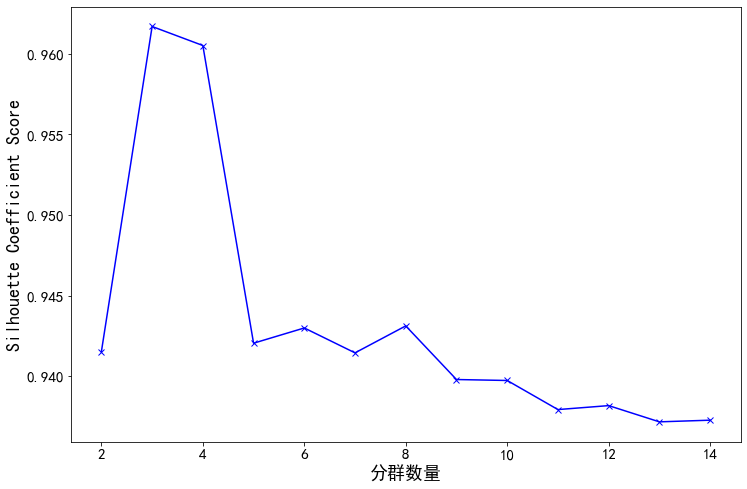

2

In [355]:
#分别创建分群2-15的KMeans模型
from sklearn import metrics
clusters = range(2,15)
sc_scores = []
for k in clusters:  
    kmeans_model = KMeans(n_clusters=k, n_jobs = 6).fit(data)
    sc_score = metrics.silhouette_score(data.astype(np.float64), kmeans_model.labels_\
                        ,sample_size=10000, metric='euclidean')
    sc_scores.append(sc_score)
    print(sc_scores)
#作出K—平均轮廓系数曲线
plt.figure()
plt.plot(clusters, sc_scores, 'bx-')
plt.rcParams['figure.figsize'] = [12,8]
plt.xlabel('分群数量',fontsize=18)
plt.ylabel('Silhouette Coefficient Score',fontsize=18)  #样本平均轮廓系数
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
sc_scores.index(max(sc_scores)) + 1

In [196]:
from sklearn.cluster import KMeans
#类簇的数量
# data = np.array(data_19)[:, 1:]
# data = np.delete(data, [3, 5], 1)
n_clusters = 3
#现在把数据和对应的分类书放入聚类函数中进行聚类
cls = KMeans(n_clusters).fit(X)
#data中每项所属分类的一个列表
label = cls.labels_
center = cls.cluster_centers_

In [26]:
center

array([[4.40081384e+00, 3.66734486e-02, 8.74085568e+00, 7.81478608e-01,
        7.25010517e+00],
       [4.08152941e+03, 3.40127451e+01, 8.59227461e+00, 7.85193135e-01,
        6.72410117e+03],
       [1.03255556e+03, 8.60462963e+00, 8.76958277e+00, 7.80760431e-01,
        1.70107999e+03]])

In [135]:
x0 = data[label == 0]
x1 = data[label == 1]
x2 = data[label == 2]

In [197]:
x0 = X[label == 0]
x1 = X[label == 1]
x2 = X[label == 2]

In [50]:
x2.shape

(219, 5)

In [198]:
print('实际交通量：')
print('0类：')
print(min(x0[:, 0].astype(np.float64)))
print(max(x0[:, 0].astype(np.float64)))
print('1类：')
print(min(x1[:, 0].astype(np.float64)))
print(max(x1[:, 0].astype(np.float64)))
print('2类：')
print(min(x2[:, 0].astype(np.float64)))
print(max(x2[:, 0].astype(np.float64)))
print('饱和度：')
print('0类：')
print(min(x0[:, 1].astype(np.float64)))
print(max(x0[:, 1].astype(np.float64)))
print('1类：')
print(min(x1[:, 1].astype(np.float64)))
print(max(x1[:, 1].astype(np.float64)))
print('2类：')
print(min(x2[:, 1].astype(np.float64)))
print(max(x2[:, 1].astype(np.float64)))
print('平均速度1：')
print('0类：')
print(min(x0[:, 2].astype(np.float64)))
print(max(x0[:, 2].astype(np.float64)))
print('1类：')
print(min(x1[:, 2].astype(np.float64)))
print(max(x1[:, 2].astype(np.float64)))
print('2类：')
print(min(x2[:, 2].astype(np.float64)))
print(max(x2[:, 2].astype(np.float64)))
print('TSI1：')
print('0类：')
print(min(x0[:, 3].astype(np.float64)))
print(max(x0[:, 3].astype(np.float64)))
print('1类：')
print(min(x1[:, 3].astype(np.float64)))
print(max(x1[:, 3].astype(np.float64)))
print('2类：')
print(min(x2[:, 3].astype(np.float64)))
print(max(x2[:, 3].astype(np.float64)))
print('密度：')
print('0类：')
print(min(x0[:, 4].astype(np.float64)))
print(max(x0[:, 4].astype(np.float64)))
print('1类：')
print(min(x1[:, 4].astype(np.float64)))
print(max(x1[:, 4].astype(np.float64)))
print('2类：')
print(min(x2[:, 4].astype(np.float64)))
print(max(x2[:, 4].astype(np.float64)))

实际交通量：
0类：
1.0
623.0
1类：
3167.0
6277.0
2类：
630.0
2971.0
饱和度：
0类：
0.008333333333333333
5.191666666666666
1类：
26.391666666666666
52.30833333333333
2类：
5.25
24.758333333333333
平均速度1：
0类：
0.0
88.0
1类：
7.894854229727577
13.506954300312234
2类：
5.8128898128898125
15.049568965517242
TSI1：
0类：
-1.2
1.0
1类：
0.6623261424921941
0.8026286442568106
2类：
0.6237607758620689
0.8546777546777546
密度：
0类：
1.6474464579901154
1026.3591433278418
1类：
5217.462932454695
10341.021416803955
2类：
1037.8912685337727
4894.563426688633


# 灰色关联聚类

In [51]:
metric = np.array(metric)
data_20 = []
for i in range(metric.shape[0]):
    t = metric[i, 0]
    date = int(t[8:10])
    if date == 20:
        data_20.append(metric[i, :])
    i += 1

In [46]:
np.array(data_20_22).shape

(3091, 8)

In [195]:
#数据集
data_20 = np.array(data_20)
X = np.array(data_20)[:, 1:]
X = np.delete(X, [3, 5], 1)
# X_01 = min(X[:, 0].astype(np.float64) - (max(X[:, 0].astype(np.float64)) - min(X[:, 0].astype(np.float64))) / 2.0)
# X_02 = min(X[:, 1].astype(np.float64))
# X_03 = max(X[:, 2].astype(np.float64))
# X_04 = min(X[:, 3].astype(np.float64))
# X_05 = min(X[:, 4].astype(np.float64))
# X0 = [X_01, X_02, X_03, X_04, X_05]
X0 = center[0]
Y = x0

In [138]:
#归一化
import math
for i in range(X.shape[0]):
    temp = abs((float(X[i, 0]) - X0[0]) / X0[0])
    if temp <= 1:
        X[i, 0] = 1 - temp
    else:
        X[i, 0] = 0
    X[i, 1] = abs((float(X[i, 1]) - min(X[:, 1].astype(np.float64))) / (max(X[:, 1].astype(np.float64)) - min(X[:, 1].astype(np.float64))))
    X[i, 2] = abs((float(X[i, 2]) - min(X[:, 2].astype(np.float64))) / (max(X[:, 2].astype(np.float64)) - min(X[:, 2].astype(np.float64))))
    X[i, 3] = abs((float(X[i, 3]) - min(X[:, 3].astype(np.float64))) / (max(X[:, 3].astype(np.float64)) - min(X[:, 3].astype(np.float64))))
    X[i, 4] = abs((float(X[i, 4]) - min(X[:, 4].astype(np.float64))) / (max(X[:, 4].astype(np.float64)) - min(X[:, 4].astype(np.float64))))

In [140]:
#归一化
import math
Xdata = np.vstack([X0, Y])
for i in range(Xdata.shape[0]):
    temp = abs((float(Xdata[i, 0]) - X0[0]) / X0[0])
    if temp <= 1:
        Xdata[i, 0] = 1 - temp
    else:
        Xdata[i, 0] = 0
    Xdata[i, 1] = abs((float(Xdata[i, 1]) - min(Xdata[:, 1].astype(np.float64))) / (max(Xdata[:, 1].astype(np.float64)) - min(Xdata[:, 1].astype(np.float64))))
    Xdata[i, 2] = abs((float(Xdata[i, 2]) - min(Xdata[:, 2].astype(np.float64))) / (max(Xdata[:, 2].astype(np.float64)) - min(Xdata[:, 2].astype(np.float64))))
    Xdata[i, 3] = abs((float(Xdata[i, 3]) - min(Xdata[:, 3].astype(np.float64))) / (max(Xdata[:, 3].astype(np.float64)) - min(Xdata[:, 3].astype(np.float64))))
    Xdata[i, 4] = abs((float(Xdata[i, 4]) - min(Xdata[:, 4].astype(np.float64))) / (max(Xdata[:, 4].astype(np.float64)) - min(Xdata[:, 4].astype(np.float64))))

In [141]:
#计算灰色关联系数
# Xdata = np.vstack([X0, Y])
rho = 0.5  # 分辨系数
gray = []
for i in range(Xdata.shape[0]):
    dif = abs(Xdata[i, :].astype(np.float64) - X.astype(np.float64))
    mmin = min(np.min(dif, axis = 1)) #计算最小差
    mmax = max(np.max(dif, axis = 1)) #计算最大差

    xs = (mmin + rho * mmax) /(dif + rho * mmax)
    #计算灰色关联度
    gray.append(np.mean(xs, axis = 1))

In [193]:
#划分
gray = np.array(gray)
lamda1 = 0.6
lamda2 = 0.8
class_car = []
for i in range(gray.shape[0]):
    c = []
    smooth = []
    jam = []
    heavy = []
    for j in range(X.shape[0]):
        if gray[i, j] > lamda2:
            smooth.append(X[i, :])
            c.append('smooth')
        elif gray[i, j] < lamda1:
            heavy.append(X[i, :])
            c.append('heavy')
        else:
            jam.append(X[i, :])
            c.append('jam')
    class_car.append(c)

In [194]:
#计算信息熵
import math
class_car = np.array(class_car)
P_C = []
P_DC = []
RD = []
n = X.shape[0]
c = ['smooth', 'jam', 'heavy']
q = class_car[0, :]
for i in range(gray.shape[0]):
    temp = class_car[i, :]
    R = []
    p = []
    same_num = []
    for j in range(3):
        t = temp[temp == c[j]]
        R.append(len(t))
        p.append(1.0 * (len(t) + 1) / (n + 3))
        if i != 0:
            num = 0
            for k in range(len(q)):
                if q[k] == c[j] and c[j] == temp[k]:
                    num += 1
            same_num.append(num)
    print(R)
    if i == 0:
        P_D = p
        RD = R
    else:
        P_C.append(p)
        P_DC.append((np.array(same_num) + 1) / (np.array(R) + 3))
P_C = np.array(P_C)
P_D = np.array(P_D)
P_DC = np.array(P_DC) 
# H_c = []
H_Dc = []
H_D = 0
for i in range(len(P_D)):
    if P_D[i] == 0:
        H_D -= 0
    else:
        H_D -= P_D[i] * math.log(P_D[i])
for i in range(P_DC.shape[0]):
#     hc = 0
    hdc = 0
    for j in range(P_DC.shape[1]):
        if P_DC[i, j] == 0:
#             hc -= 0
            hdc -= 0
        else:
#             hc -= P_C[i, j] * math.log(P_C[i, j])
            hdc -= P_DC[i, j] * math.log(P_DC[i, j])
#     H_c.append(hc)
    H_Dc.append(hdc)
H_D = np.array(H_D)
H_Dc = np.array(H_Dc)
I_cD = abs(H_D - H_Dc)

[1128, 319, 19]
[26, 289, 1151]
[440, 984, 42]
[1070, 371, 25]
[1025, 426, 15]
[955, 495, 16]
[1063, 378, 25]
[1063, 378, 25]
[1204, 253, 9]
[1155, 293, 18]
[1210, 248, 8]
[1179, 268, 19]
[1063, 378, 25]
[730, 706, 30]
[954, 496, 16]
[954, 496, 16]
[741, 695, 30]
[1204, 249, 13]
[1155, 304, 7]
[1193, 263, 10]
[877, 568, 21]
[1063, 378, 25]
[1214, 245, 7]
[1047, 391, 28]
[1063, 378, 25]
[1102, 338, 26]
[1060, 380, 26]
[834, 606, 26]
[954, 496, 16]
[1041, 397, 28]
[954, 496, 16]
[1134, 307, 25]
[954, 496, 16]
[1063, 378, 25]
[1132, 313, 21]
[833, 605, 28]
[858, 579, 29]
[1206, 249, 11]
[978, 477, 11]
[844, 601, 21]
[843, 597, 26]
[1034, 404, 28]
[229, 1207, 30]
[1063, 378, 25]
[446, 990, 30]
[1206, 252, 8]
[982, 472, 12]
[1116, 329, 21]
[1150, 293, 23]
[1134, 307, 25]
[974, 481, 11]
[1063, 378, 25]
[1034, 404, 28]
[1121, 320, 25]
[732, 704, 30]
[1102, 338, 26]
[1186, 262, 18]
[974, 480, 12]
[702, 734, 30]
[954, 496, 16]
[1102, 338, 26]
[766, 699, 1]
[989, 454, 23]
[1149, 306, 11]
[1161, 

[732, 704, 30]
[1102, 338, 26]
[1063, 378, 25]
[1034, 404, 28]
[954, 496, 16]
[1040, 400, 26]
[1102, 338, 26]
[1041, 397, 28]
[954, 496, 16]
[1198, 259, 9]
[1063, 378, 25]
[1063, 378, 25]
[1063, 378, 25]
[853, 594, 19]
[1102, 338, 26]
[1063, 378, 25]
[1063, 378, 25]
[954, 496, 16]
[1222, 237, 7]
[1155, 292, 19]
[1063, 378, 25]
[1041, 397, 28]
[954, 496, 16]
[1102, 338, 26]
[1082, 359, 25]
[1063, 378, 25]
[1063, 378, 25]
[954, 496, 16]
[1034, 404, 28]
[1063, 378, 25]
[954, 496, 16]
[1041, 397, 28]
[738, 698, 30]
[1034, 404, 28]
[954, 496, 16]
[721, 715, 30]
[1034, 404, 28]
[1034, 404, 28]
[954, 496, 16]
[954, 496, 16]
[1063, 378, 25]
[1063, 378, 25]
[1063, 378, 25]
[1102, 338, 26]
[1034, 404, 28]
[1102, 338, 26]
[954, 496, 16]
[954, 496, 16]
[1107, 334, 25]
[1102, 338, 26]
[1056, 383, 27]
[1078, 363, 25]
[1102, 338, 26]
[954, 496, 16]
[1063, 378, 25]
[954, 496, 16]
[1041, 400, 25]
[954, 496, 16]
[954, 496, 16]
[615, 820, 31]
[1102, 338, 26]
[1063, 378, 25]
[954, 496, 16]
[1244, 214, 8]


In [192]:
gray = np.array(gray)
m = gray[0, :]
num = 0
for i in range(len(m)):
    if m[i] > 0:
#     if m[i] <  0.6:
        num += 1
num
# max(m.astype(np.float64))

319

In [157]:
x1.shape

(17, 5)

In [199]:
#分类
w = []
E = sum(I_cD)
Level = []

for i in range(len(I_cD)):
    w.append(I_cD[i] / E)
for column in range(class_car.shape[1]):
    w1 = 0
    w2 = 0
    w3 = 0
    for row in range(class_car.shape[0] - 1):
        if class_car[row + 1, column] == 'smooth':
            w1 += w[row]
        elif class_car[row + 1, column] == 'jam':
            w2 += w[row]
        else:
            w3 += w[row]
    W_ = [w1, w2, w3]
    Level.append(W_.index(max(W_)))
Level

[1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [207]:
#计算正确率
acc = 0
L = np.array(Level)
# L = class_car[10, :]
l = []
for i in range(len(label)):
    if label[i] == 1:
        l.append(2)
    elif label[i] == 2:
        l.append(1)
    else:
        l.append(0)
l = np.array(l)
for i in range(len(L)):
    
    if L[i] == l[i] and l[i] == 0:
        print(X[i, :])
        print(i)
        acc += 1
print(acc / len(l[l == 2]))
print(acc)

['2' '0.016666666666666666' '0.0' '1.0' '3.2948929159802307']
4
['2' '0.016666666666666666' '0.0' '1.0' '3.2948929159802307']
5
['4' '0.03333333333333333' '0.0' '1.0' '6.589785831960461']
6
['6' '0.05' '0.3333333333333333' '0.9916666666666666' '9.884678747940692']
7
['4' '0.03333333333333333' '0.25' '0.99375' '6.589785831960461']
8
['6' '0.05' '13.333333333333334' '0.6666666666666666' '9.884678747940692']
9
['3' '0.025' '1.3333333333333333' '0.9666666666666666' '4.942339373970346']
10
['6' '0.05' '6.333333333333333' '0.8416666666666666' '9.884678747940692']
11
['2' '0.016666666666666666' '0.0' '1.0' '3.2948929159802307']
12
['4' '0.03333333333333333' '0.0' '1.0' '6.589785831960461']
13
['5' '0.041666666666666664' '12.4' '0.6900000000000001'
 '8.237232289950576']
14
['5' '0.041666666666666664' '21.8' '0.45499999999999996'
 '8.237232289950576']
15
['7' '0.058333333333333334' '7.428571428571429' '0.8142857142857143'
 '11.532125205930807']
16
['4' '0.03333333333333333' '31.25' '0.21875' '6

['4' '0.03333333333333333' '16.5' '0.5875' '6.589785831960461']
1315
['2' '0.016666666666666666' '0.0' '1.0' '3.2948929159802307']
1316
['2' '0.016666666666666666' '13.0' '0.675' '3.2948929159802307']
1317
['3' '0.025' '25.0' '0.375' '4.942339373970346']
1318
['5' '0.041666666666666664' '13.8' '0.655' '8.237232289950576']
1319
['2' '0.016666666666666666' '21.5' '0.4625' '3.2948929159802307']
1320
['2' '0.016666666666666666' '0.0' '1.0' '3.2948929159802307']
1322
['3' '0.025' '15.333333333333334' '0.6166666666666666' '4.942339373970346']
1323
['5' '0.041666666666666664' '19.4' '0.515' '8.237232289950576']
1325
['3' '0.025' '16.666666666666668' '0.5833333333333333' '4.942339373970346']
1326
['4' '0.03333333333333333' '0.0' '1.0' '6.589785831960461']
1328
['1' '0.008333333333333333' '0.0' '1.0' '1.6474464579901154']
1329
['7' '0.058333333333333334' '19.285714285714285' '0.5178571428571429'
 '11.532125205930807']
1330
['3' '0.025' '0.0' '1.0' '4.942339373970346']
1331
['2' '0.0166666666666

In [204]:
print(len(l[l == 0]))

1318


# 实际交通量

In [114]:
i = 0 #从第几辆车开始提取
u = data[i, 0]
hour = u[11:13]
minite = u[14:16]
second = u[17:19]
m = int(minite)
end = m + 5
car_num = []
while m < end + 1:#提取五分钟的车辆数据
    car_num.append(data[i, :])
    i = i + 1
    c = data[i, 0]
    m = int(c[14:16])
    s = int(c[17:19])
    if end > 60:
         if m < int(minite):
                m = m + 60
    if s > int(second) and m == end:
        break
car_num = np.array(car_num)
car_num.shape

(480, 6)

# 实际交通量/路段通行能力

In [136]:
car_num.shape[0] / 1640.0

0.2926829268292683

# 平均速度

In [138]:
v1 = car_num[:, 4]
sum_v1 = 0
for i in range(car_num.shape[0]):
    sum_v1 = sum_v1 + int(car_num[i, 4])
mean_v1 = sum_v1 / car_num.shape[0]
mean_v1

8.6625

# TSI

In [140]:
tsi = (40.0 - mean_v1) / 40.0
tsi

0.7834375

# 密度

In [131]:
car_num.shape[0] / 0.607

790.7742998352554

# 写文件

In [14]:
with open("C:/Users/lenovo/Desktop/test.txt", "w") as f:    #打开文件
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            f.write(str(data[i, j]))   #读取文件
            f.write(' ')
            if (j + 1) % 6 == 0:
               f.write('\n')